In [1]:
from keras.layers import Input, Dense
from keras.models import Model


encoding_dim = 32


input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


4422102/4422102 [==============================] - 0s 0us/step


In [2]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
47/47 [==============================] - 2s 21ms/step - loss: 0.5611 - accuracy: 0.0013 - val_loss: 0.4616 - val_accuracy: 0.0010
Epoch 2/5
47/47 [==============================] - 1s 13ms/step - loss: 0.4252 - accuracy: 0.0052 - val_loss: 0.4009 - val_accuracy: 0.0060
Epoch 3/5
47/47 [==============================] - 0s 8ms/step - loss: 0.3853 - accuracy: 0.0103 - val_loss: 0.3762 - val_accuracy: 0.0130
Epoch 4/5
47/47 [==============================] - 0s 8ms/step - loss: 0.3644 - accuracy: 0.0095 - val_loss: 0.3598 - val_accuracy: 0.0100
Epoch 5/5
47/47 [==============================] - 0s 8ms/step - loss: 0.3507 - accuracy: 0.0117 - val_loss: 0.3487 - val_accuracy: 0.0150


In [3]:
prediction = autoencoder.predict(x_test)


32/32 [==============================] - 0s 2ms/step


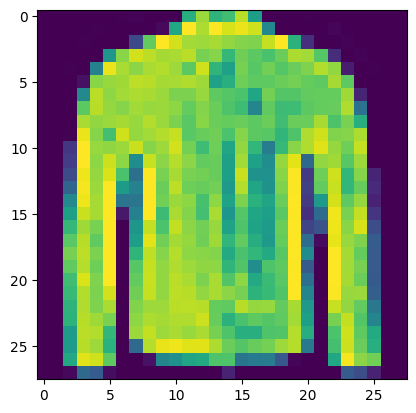

In [4]:
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

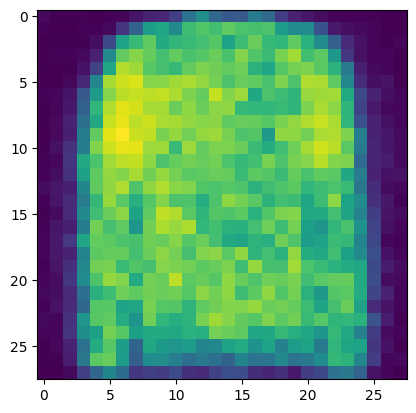

In [5]:
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

1. Add one more hidden layer to autoencoder

In [7]:


input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 18s 31ms/step - loss: 0.3224 - accuracy: 0.0138 - val_loss: 0.2930 - val_accuracy: 0.0168
Epoch 2/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2861 - accuracy: 0.0230 - val_loss: 0.2847 - val_accuracy: 0.0270
Epoch 3/5
469/469 [==============================] - 12s 26ms/step - loss: 0.2805 - accuracy: 0.0284 - val_loss: 0.2808 - val_accuracy: 0.0267
Epoch 4/5
469/469 [==============================] - 21s 44ms/step - loss: 0.2774 - accuracy: 0.0320 - val_loss: 0.2782 - val_accuracy: 0.0329
Epoch 5/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2753 - accuracy: 0.0341 - val_loss: 0.2767 - val_accuracy: 0.0338


2.Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

In [8]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

313/313 [==============================] - 2s 6ms/step


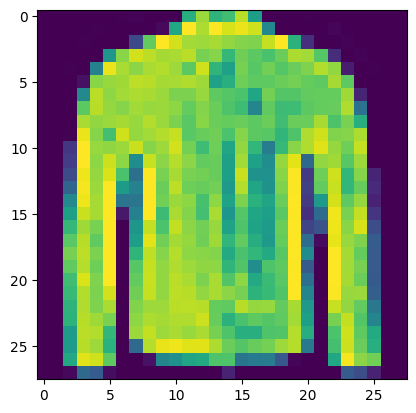

In [9]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

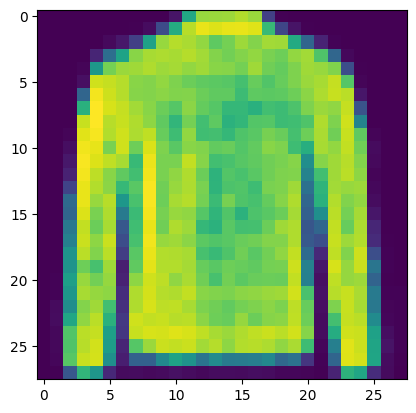

In [10]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

3.Repeat the question 2 on the denoisening autoencoder

In [11]:
from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
     # this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [12]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [13]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
24/24 [==============================] - 3s 56ms/step - loss: 0.6355 - accuracy: 0.0022 - val_loss: 0.5477 - val_accuracy: 0.0030
Epoch 2/10
24/24 [==============================] - 1s 24ms/step - loss: 0.4986 - accuracy: 0.0015 - val_loss: 0.4518 - val_accuracy: 0.0050
Epoch 3/10
24/24 [==============================] - 1s 31ms/step - loss: 0.4289 - accuracy: 0.0030 - val_loss: 0.4077 - val_accuracy: 0.0030
Epoch 4/10
24/24 [==============================] - 1s 22ms/step - loss: 0.4003 - accuracy: 0.0070 - val_loss: 0.3888 - val_accuracy: 0.0030
Epoch 5/10
24/24 [==============================] - 1s 22ms/step - loss: 0.3853 - accuracy: 0.0072 - val_loss: 0.3759 - val_accuracy: 0.0040
Epoch 6/10
24/24 [==============================] - 1s 23ms/step - loss: 0.3744 - accuracy: 0.0070 - val_loss: 0.3654 - val_accuracy: 0.0030
Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 0.3654 - accuracy: 0.0077 - val_loss: 0.3563 - val_accuracy: 0.0020
Epoch 8/10
24

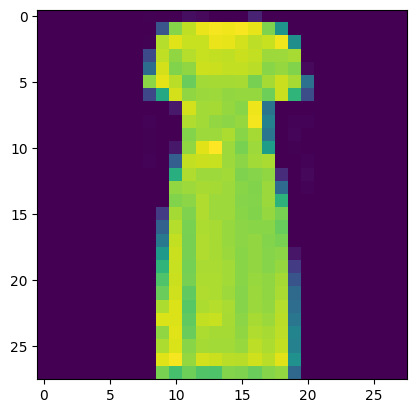

In [14]:
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()


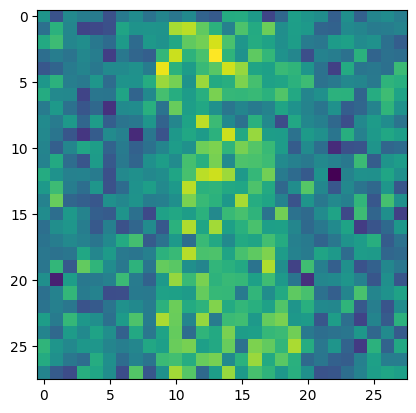

In [15]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()


In [16]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

32/32 [==============================] - 0s 1ms/step


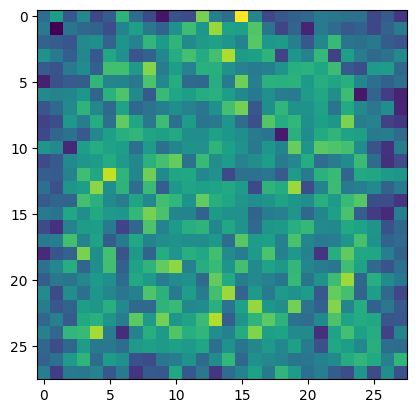

In [17]:
#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()


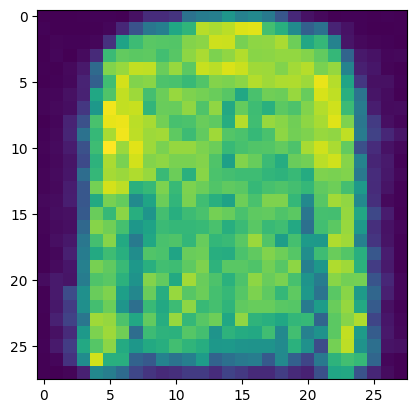

In [18]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()


4.plot loss and accuracy using the history object

In [19]:
autoencoder.metrics_names


['loss', 'accuracy']

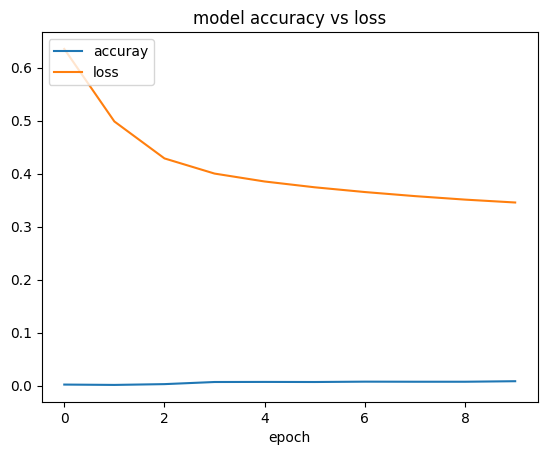

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()